<a href="https://colab.research.google.com/github/arezyhs/Python-Digital-Image-Processing-Projects/blob/main/project_digital_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving F921G4IIJX58MRB.LARGE_.jpg to F921G4IIJX58MRB.LARGE_.jpg


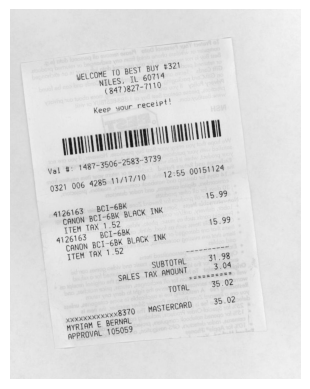

In [12]:
from google.colab import files
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# unggah gambar
uploaded = files.upload()

# ambil nama file gambar yang diunggah
image = next(iter(uploaded))  # ambil nama file pertama yang diunggah

# baca gambar
img = imread(image)

# cek apakah gambar memiliki 3 saluran (RGB atau RGBA)
if len(img.shape) == 3 and img.shape[2] == 4:
    # jika gambar memiliki saluran alpha (RGBA), hapus saluran alpha-nya
    img = img[:, :, :3]

# cek apakah gambar sudah berwarna abu-abu (2D)
if len(img.shape) == 2:
    # gambar sudah abu-abu, gunakan gambar langsung
    grayscale_img = img
else:
    # konversi gambar ke abu-abu (grayscale)
    grayscale_img = rgb2gray(img)

# tampilkan gambar abu-abu
plt.imshow(grayscale_img, cmap="gray")
plt.axis('off')  # sembunyikan sumbu
plt.show()

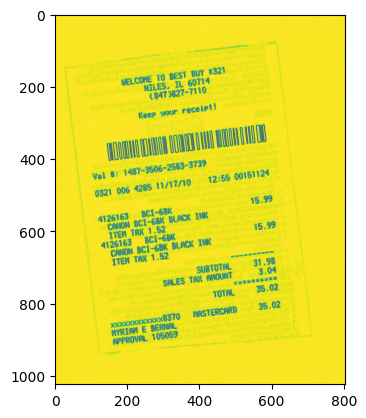

In [13]:
from skimage.filters import sobel
from skimage.util import invert

# terapkan filter sobel untuk mendeteksi tepi pada gambar
sobel_image = invert(sobel(img))

# tampilkan gambar yang sudah melalui filter sobel
plt.imshow(sobel_image)

# cek apakah gambar memiliki 3 saluran (RGB atau RGBA)
if len(sobel_image.shape) == 3:
    # jika gambar memiliki lebih dari satu saluran (RGB), ubah menjadi grayscale
    sobel_image = rgb2gray(sobel_image)  # konversi ke grayscale

In [14]:
import numpy as np
from skimage.transform import rotate

# cari proyeksi horizontal dari semua baris dalam gambar
# putar gambar antara sudut -10 hingga 10 derajat dan cari sudut yang menghasilkan median terkecil dari proyeksi horizontal
def horizontal_projections(sobel_image):
    sum_of_cols = []  # list untuk menyimpan hasil proyeksi horizontal
    rows, cols = sobel_image.shape  # mendapatkan jumlah baris dan kolom dari gambar (2D)
    for row in range(rows-1):
        sum_of_cols.append(np.sum(sobel_image[row,:]))  # jumlahkan nilai di setiap baris untuk mendapatkan proyeksi horizontal
    return sum_of_cols

### horizontal projections on line plot

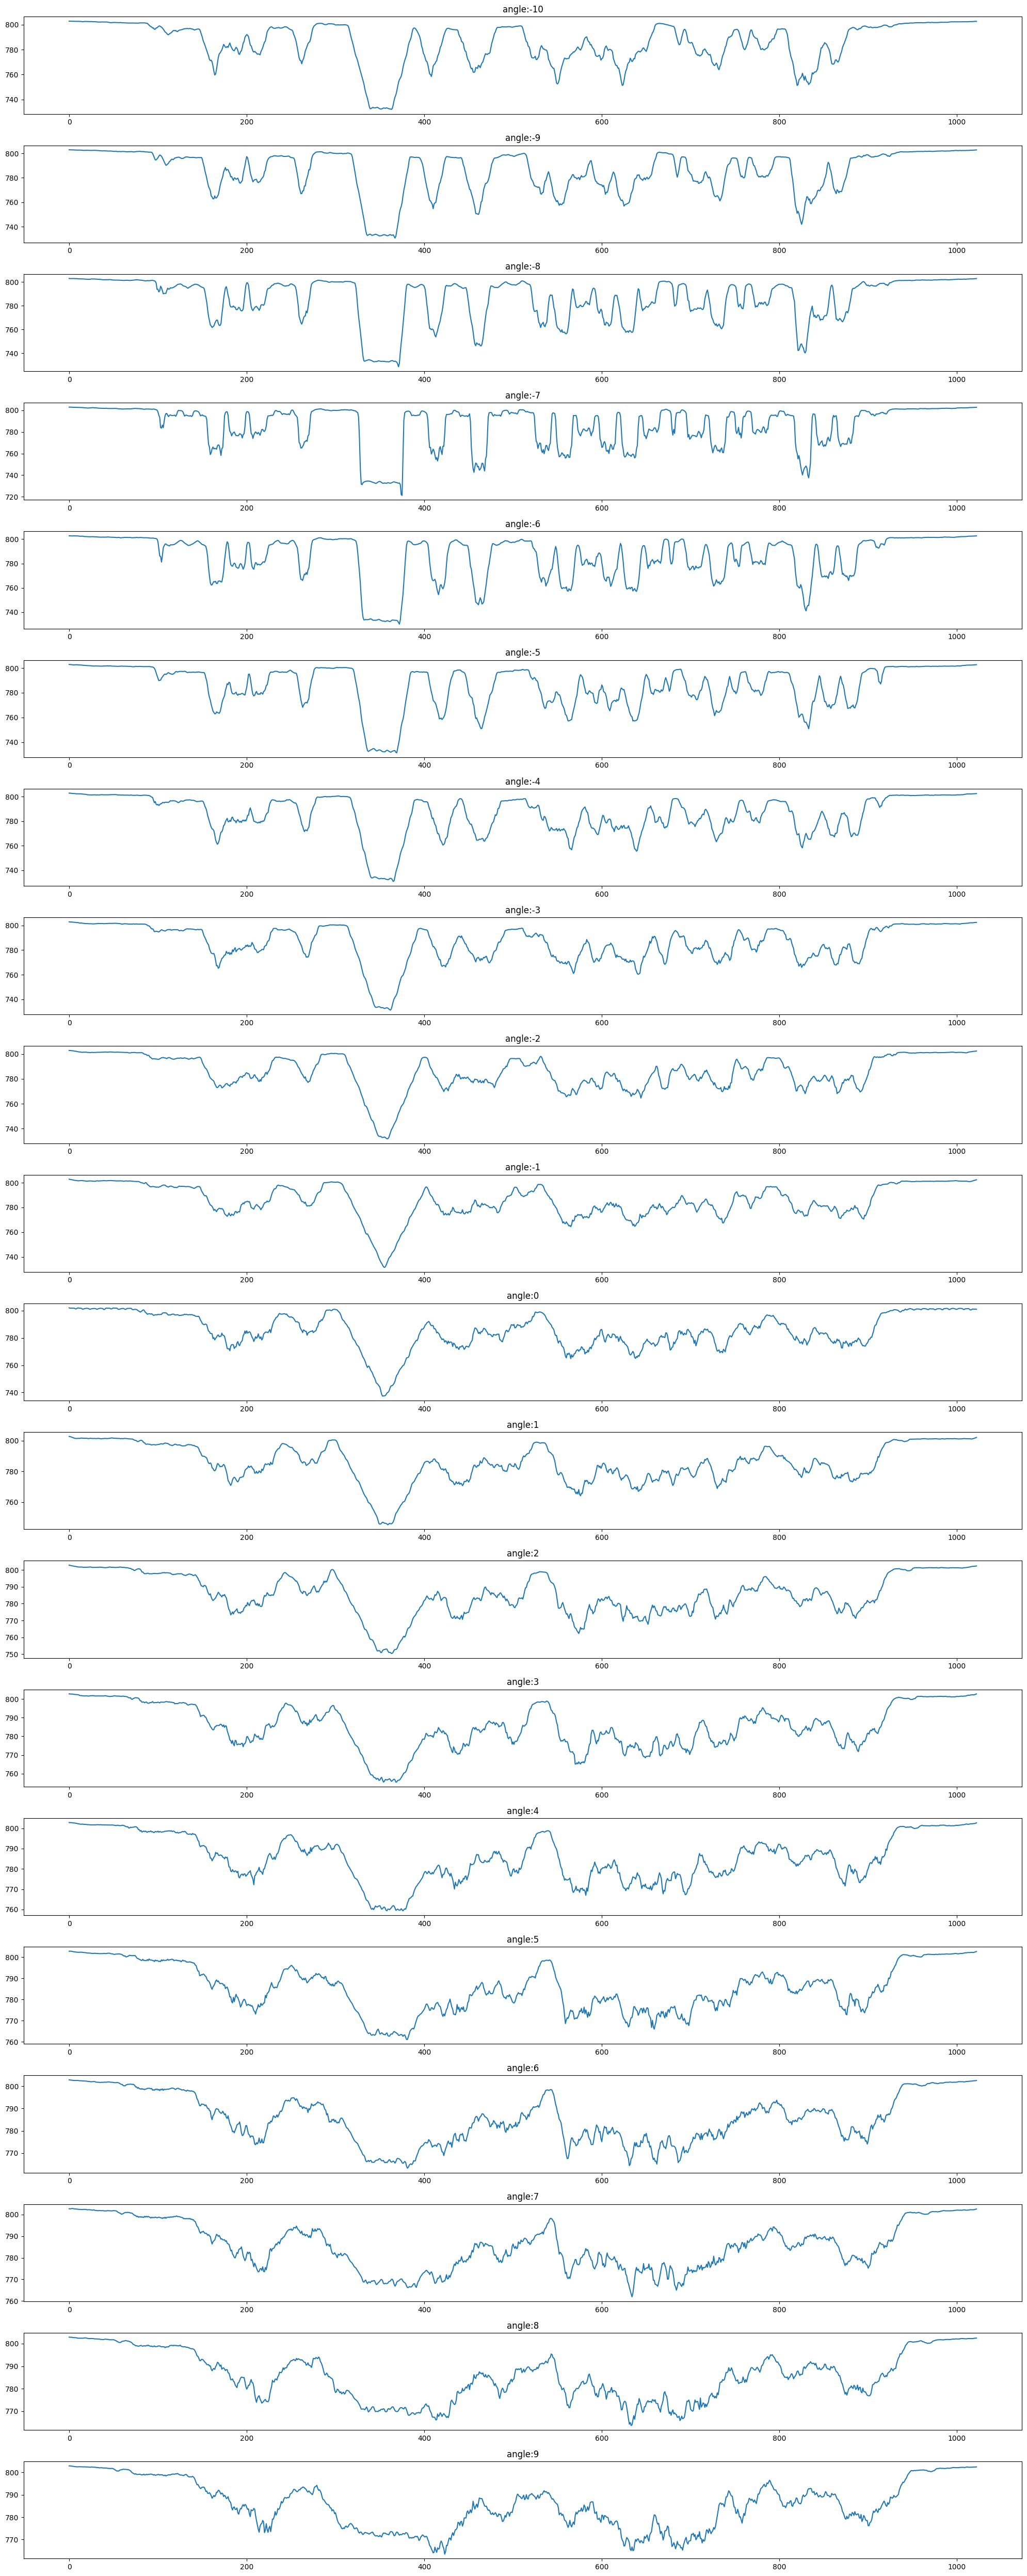

In [15]:
# set up subplots untuk menampilkan gambar dengan 20 baris dan ukuran gambar besar
fig, ax = plt.subplots(nrows=20, figsize=(20,50))

# loop melalui berbagai sudut dan plot proyeksi horizontal
for index, angle in enumerate(range(-10, 10)):
    ax[index].set_title('angle:' + str(angle))  # beri judul untuk setiap subplot berdasarkan sudut
    rotated_image = rotate(sobel_image, angle, cval=1)  # putar gambar dengan sudut tertentu
    hp = horizontal_projections(rotated_image)  # dapatkan proyeksi horizontal untuk gambar yang sudah diputar
    xv = []  # list untuk menyimpan nilai x (indeks baris)
    yv = []  # list untuk menyimpan nilai y (nilai proyeksi horizontal)

    # loop untuk menyimpan nilai proyeksi horizontal
    for i, y in enumerate(hp):
        xv.append(i)  # tambahkan indeks baris ke xv
        yv.append(y)  # tambahkan nilai proyeksi ke yv

    ax[index].plot(yv)  # plotkan proyeksi horizontal pada subplot yang sesuai

# rapikan layout agar tidak ada elemen yang terpotong
plt.tight_layout()
plt.show()

### box plot of these horizontal projections

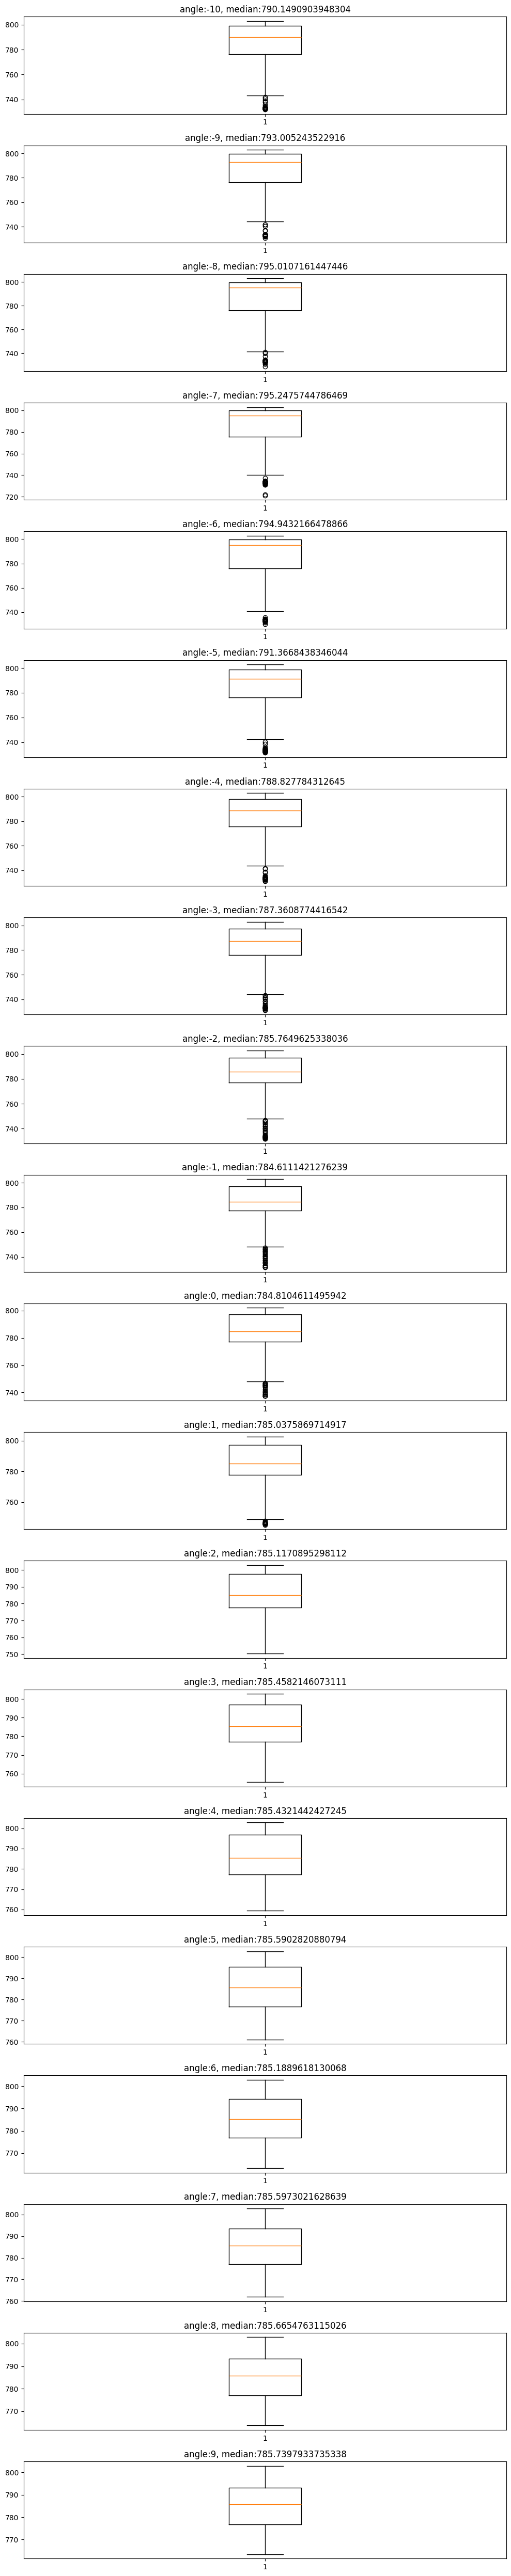

In [16]:
# set up subplots untuk menampilkan gambar dengan 20 baris dan ukuran gambar lebih kecil
fig, ax = plt.subplots(nrows=20, figsize=(10,50))

# loop melalui berbagai sudut dan plot proyeksi horizontal
for index, angle in enumerate(range(-10, 10)):
    hp = horizontal_projections(rotate(sobel_image, angle, cval=1))  # dapatkan proyeksi horizontal untuk gambar yang sudah diputar
    xv = []  # list untuk menyimpan nilai x (indeks baris)
    yv = []  # list untuk menyimpan nilai y (nilai proyeksi horizontal)

    # loop untuk menyimpan nilai proyeksi horizontal
    for i, y in enumerate(hp):
        xv.append(i)  # tambahkan indeks baris ke xv
        yv.append(y)  # tambahkan nilai proyeksi ke yv

    # set judul untuk subplot dengan informasi sudut dan median proyeksi horizontal
    ax[index].set_title('angle:' + str(angle) + ', median:' + str(np.median(hp)))

    # plot boxplot dari proyeksi horizontal untuk setiap sudut
    ax[index].boxplot(yv)

# rapikan layout agar tidak ada elemen yang terpotong
plt.tight_layout()
plt.show()

### Extract the angle which gave the highest median.

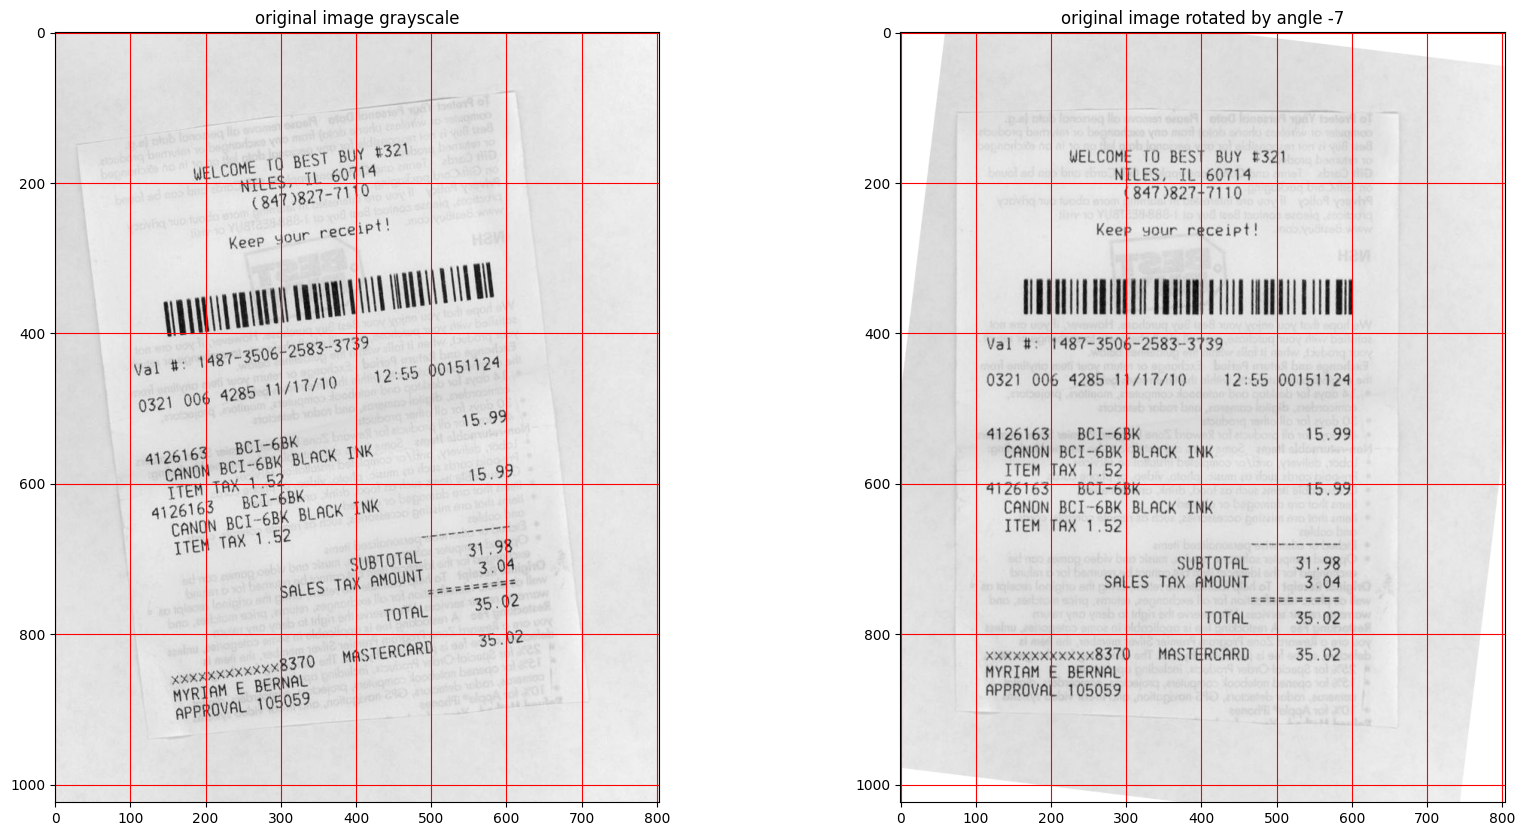

In [17]:
# dapatkan jumlah baris dan kolom dari gambar sobel
rows, cols = sobel_image.shape

# variabel untuk menyimpan sudut yang diprediksi dan nilai proyeksi horizontal tertinggi
predicted_angle = 0
highest_hp = 0

# loop melalui berbagai sudut dan cari sudut dengan proyeksi horizontal median tertinggi
for index, angle in enumerate(range(-10, 10)):
    hp = horizontal_projections(rotate(sobel_image, angle, cval=1))  # dapatkan proyeksi horizontal untuk gambar yang sudah diputar
    median_hp = np.median(hp)  # hitung median dari proyeksi horizontal

    # jika median proyeksi horizontal lebih tinggi dari sebelumnya, perbarui sudut yang diprediksi
    if highest_hp < median_hp:
        predicted_angle = angle
        highest_hp = median_hp

# set up subplots untuk menampilkan gambar asli dan gambar yang diputar dengan sudut yang diprediksi
fig, ax = plt.subplots(ncols=2, figsize=(20,10))

# tampilkan gambar asli (grayscale)
ax[0].set_title('original image grayscale')
ax[0].imshow(img, cmap="gray")
ax[0].grid(color='r', linestyle='-', markevery=1)

# tampilkan gambar asli yang diputar dengan sudut yang diprediksi
ax[1].set_title('original image rotated by angle ' + str(predicted_angle))
ax[1].imshow(rotate(img, predicted_angle, cval=1), cmap="gray")
ax[1].grid(color='r', linestyle='-', markevery=1)

### Tahap OCR

In [18]:
!pip install pytesseract

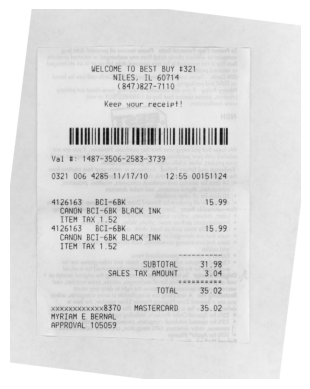

Hasil OCR: 
WELCOME TO BEST BUY #321
NILES, IL 60714
(847 827-7110

Keep your receipt!

Val #: 1487-3506-2583-3739

 

0321 006 4285 11/17/10 12:55 00151124

4126163  BCI-6BK 15.99
CANON BCI-6BK BLACK INK
ITEM TAX 1.52
4126163 BCI-6BK 15.99
CANON BCI-6BK BLACK INK
ITEM TAX 1.52
SUBTOTAL 31.98
SALES TAX AMOUNT 3.04

TOTAL 35.02

XXXXXXXXXXXX8370 — MASTERCARD 35.02
MYRIAM E BERNAL
APPROVAL 105059



In [19]:
import numpy as np
import pytesseract
from skimage.transform import rotate
import matplotlib.pyplot as plt

# Pastikan gambar sudah diputar
final_image = rotate(img, predicted_angle, cval=1)

# Jika gambar berada dalam rentang 0-1 (misalnya setelah rgb2gray), skalakan ke 0-255
final_image_uint8 = (final_image * 255).astype(np.uint8)

# Tampilkan gambar akhir yang sudah diproses
plt.imshow(final_image_uint8, cmap="gray")
plt.axis('off')  # Sembunyikan sumbu
plt.show()

# Proses gambar ini untuk OCR (menggunakan pytesseract)
# Menggunakan gambar yang diputar (final_image_uint8) untuk OCR
text = pytesseract.image_to_string(final_image_uint8)

# Tampilkan teks hasil OCR
print("Hasil OCR: ")
print(text)